Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.
A base de dados para este desafio pode ser algo como no exemplo a seguir:

---

idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332

---

Você precisa apenas alimentar ela com mais informações ou utilizar uma outra de sua preferência.


# Tarefas:

**Exploracão de dados:**

Carregue a base de dados e explore suas características.

Analise estatísticas descritivas e visualize distribuicões relevantes.

**Pré-processamento de dados:**

Realize a limpeza dos dados, tratando valores ausentes (se necessário).

Converta variáveis categóricas em formatos adequados para modelagem.

**Modelagem:**

Crie um modelo preditivo de regressão utilizando uma técnica à sua escolhe (por exemplo, Regressão Linear, Árvore de Decisão, etc).

**Treinamento e avaliacão do modelo:**

Treine o modelo com o conjunto de treinamento

**Validacão estatística:**

Utilize métricas estatísticas para validar a eficacácia do modelo (p-value, intervalos de confianca).

**O que avaliaremos:**

Apresente resultados visuais, como gráficos de previsões vs valores reais.

Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validacão estatística.

**Observacões:**

Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.


        

Importamos nossas bibliotecas e carregamos nosso dados.csv

In [27]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('./dados.csv') #Carrego documento
df.head(10) #Mostro os top 10

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,feminino,29.77,2,sim,sudoeste,31109.89
1,46,masculino,25.86,1,não,nordeste,26650.70
2,32,masculino,23.01,0,não,sudoeste,21459.04
3,45,feminino,28.56,1,sim,nordeste,28455.23
4,41,masculino,30.52,3,não,nordeste,34899.12
5,33,masculino,26.50,2,não,nordeste,29089.66
6,55,feminino,27.86,0,sim,sul,33507.86
7,37,masculino,29.92,1,não,sul,31468.49
8,62,feminino,24.36,2,não,nordeste,26165.81
9,49,masculino,26.12,0,não,sudoeste,26587.33


# Vamos iniciar a análise exploratória e ver como nossos dados estão distribuidos!

In [29]:
df.shape

(159, 7)

In [30]:
df.describe()

,idade,imc,filhos,encargos
count,159.000000,159.000000,159.000000,159.000000
mean,47.735849,27.843333,1.471698,31204.913774
std,10.964530,1.791205,1.017638,4103.217767
min,27.000000,22.950000,0.000000,21459.040000
25%,39.000000,26.520000,1.000000,28142.340000
50%,47.000000,27.840000,1.000000,31468.490000
75%,56.000000,29.370000,2.000000,34252.895000
max,75.000000,31.210000,3.000000,40473.260000


**Podemos ver acima as médias de nossas colunas no dataframe.**

**Ex: O máximo de filhos são 3 e 50% do dataframe tem somente 1 filho.**

Vamos analisar agora o .info do nosso dataframe para entender os tipos das variáveis e quais são categóricas

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     159 non-null    int64  
 1   gênero    159 non-null    object 
 2   imc       159 non-null    float64
 3   filhos    159 non-null    int64  
 4   fumante   159 non-null    object 
 5   região    159 non-null    object 
 6   encargos  159 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 8.8+ KB


Verificamos se temos nulos em nosso dataframe:



In [32]:
df.isnull().sum()

idade       0
gênero      0
imc         0
filhos      0
fumante     0
região      0
encargos    0
dtype: int64

**Não temos nenhum nulo em nosso dataframe!**

Verificamos se temos duplicatas em nosso dataframe

In [33]:
df.duplicated().sum()

0

**Não temos nenhum duplicata em nosso dataframe!**

In [34]:
df.gênero.value_counts()

gênero
masculino    83
feminino     76
Name: count, dtype: int64

**Verificamos nossa distribuicão de gêneros e podemos ver que masculino:83 e feminino:76, está equilibrado!**

# Vamos plotar gráficos para entender a frequência de algumas variáveis.

Frequência dos gêneros:

<BarContainer object of 2 artists>

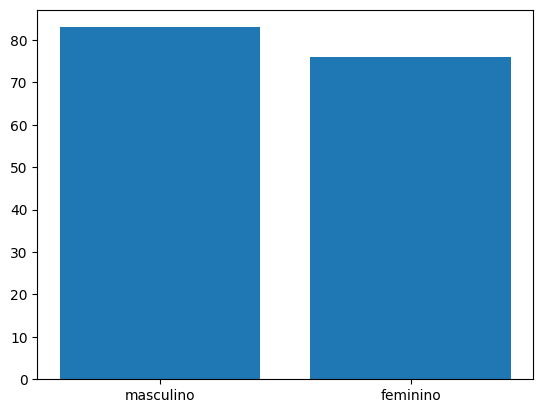

In [35]:
plt.bar(df.gênero.value_counts().index,df.gênero.value_counts().values) #frequência dos gêneros

**Aqui podemos ver a mesma coisa referente aos gêneros porém de uma forma mais visual, onde os 2 estão equilibrados**

Frequência dos filhos:

<BarContainer object of 4 artists>

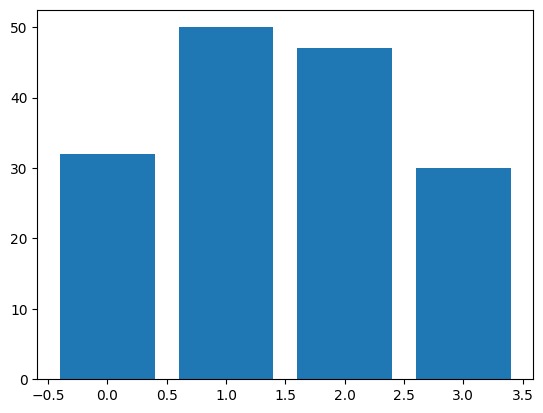

In [36]:
plt.bar(df.filhos.value_counts().index,df.filhos.value_counts().values) #frequência dos filhos

**Podemos ver acima que a grande maioria possui 1 ou 2 filhos somente e a minoria possui 3 filhos!**

Frequência dos fumantes:

<BarContainer object of 2 artists>

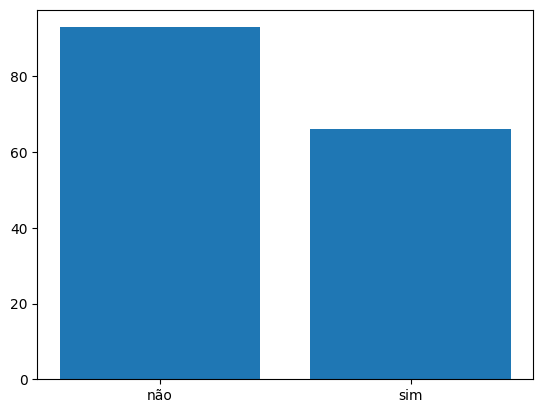

In [37]:
plt.bar(df.fumante.value_counts().index,df.fumante.value_counts().values) #frequência de fumantes

**Chegamos ao resultado de que temos mais "não fumantes" do que "fumantes" em nosso dataframe**

Vamos verificar agora qual a distribuicão de fumantes entre os gêneros:

gênero
masculino    38
feminino     28
Name: count, dtype: int64


<BarContainer object of 2 artists>

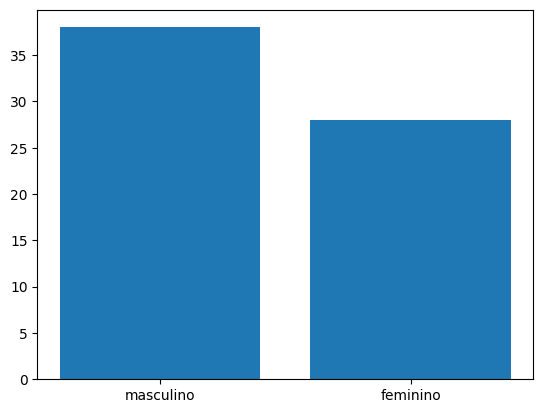

In [38]:
# Filtrar o DataFrame para incluir apenas os fumantes
fumantes = df[df['fumante'] == 'sim']

# Contar o número de ocorrências de cada gênero
contagem_genero = fumantes['gênero'].value_counts()
print(contagem_genero)

# Plotar o número de fumantes para cada gênero
plt.bar(contagem_genero.index, contagem_genero.values)

**Conseguimos perceber com esse gráfico que o número de fumantes do gênero "masculino" é maior do que no gênero "feminino".**

Vamos analisar a média paga de encargos divido por gênero:

gênero
feminino     30260.903421
masculino    32069.308795
Name: encargos, dtype: float64


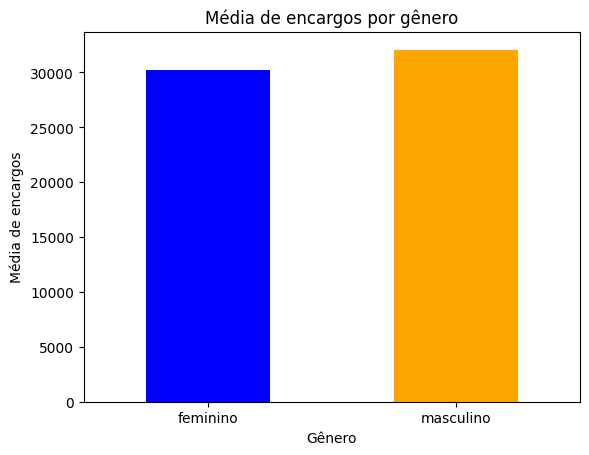

In [39]:
# Calcular a média dos encargos para cada gênero
media_encargos = df.groupby('gênero')['encargos'].mean()
print(media_encargos)
# Plotar os resultados
media_encargos.plot(kind='bar', color=['blue', 'orange'])
plt.title('Média de encargos por gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de encargos')
plt.xticks(rotation=0)  # Rotação dos rótulos do eixo x para facilitar a leitura
plt.show()

**Através do gráfico podemos ver que os encargos pagos são semelhantes entre os gêneros**

Vamos analisar a média paga de encargos divido por fumantes/não fumantes:

fumante
não    29770.719892
sim    33225.823333
Name: encargos, dtype: float64


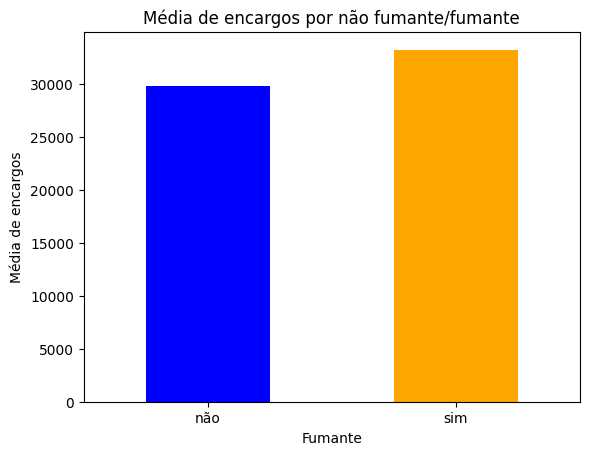

In [40]:
# Calcular a média dos encargos para não fumantes/fumantes
media_encargos = df.groupby('fumante')['encargos'].mean()
print(media_encargos)
# Plotar os resultados
media_encargos.plot(kind='bar', color=['blue', 'orange'])
plt.title('Média de encargos por não fumante/fumante')
plt.xlabel('Fumante')
plt.ylabel('Média de encargos')
plt.xticks(rotation=0)  # Rotação dos rótulos do eixo x para facilitar a leitura
plt.show()

**Aqui temos uma informacão importante de que os "fumantes" possuem mais encargos do que os "não fumantes"!**

Vamos analisar a média paga de encargos divido por região:

região
nordeste    29080.641212
norte       30919.948182
sudeste     32834.192581
sudoeste    31541.533125
sul         31572.981463
Name: encargos, dtype: float64


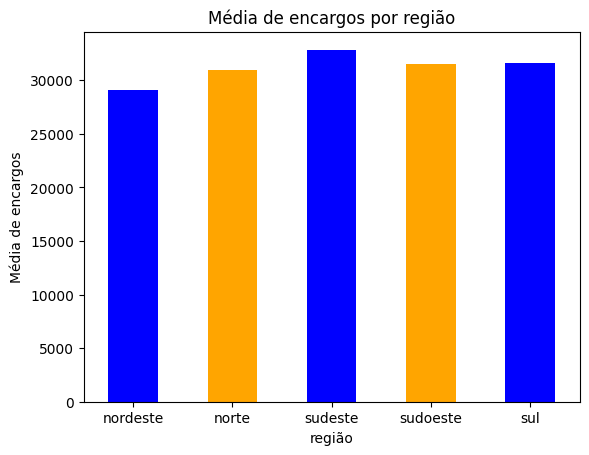

In [41]:
# Calcular a média dos encargos para não fumantes/fumantes
media_encargos = df.groupby('região')['encargos'].mean()
print(media_encargos)
# Plotar os resultados
media_encargos.plot(kind='bar', color=['blue', 'orange'])
plt.title('Média de encargos por região')
plt.xlabel('região')
plt.ylabel('Média de encargos')
plt.xticks(rotation=0)  # Rotação dos rótulos do eixo x para facilitar a leitura
plt.show()

**Nas regiões não percebemos muita discrepância, aparentemente está equilibrado os encargos.**

Vamos analisar também o IMC referente aos Encargos, será que quanto maior o IMC mais encargo é pago?

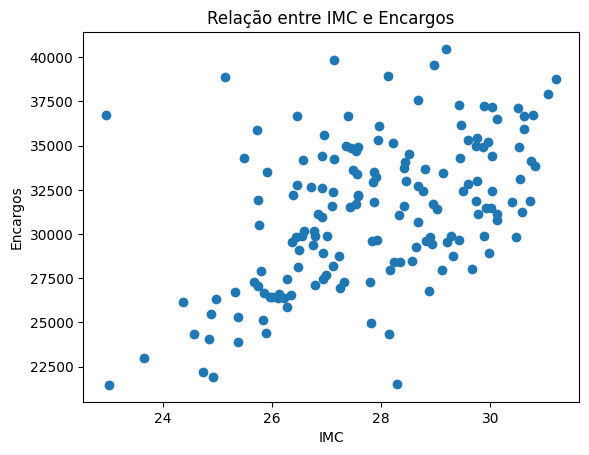

In [42]:
plt.scatter(df['imc'], df['encargos'])
plt.xlabel('IMC')
plt.ylabel('Encargos')
plt.title('Relação entre IMC e Encargos')
plt.show()

**Podemos ver acima que quanto maior o IMC mais "bolinhas azuis" temos nos níveis altos de encargo.**

# Vamos agora pré-processar nossas variáveis!

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     159 non-null    int64  
 1   gênero    159 non-null    object 
 2   imc       159 non-null    float64
 3   filhos    159 non-null    int64  
 4   fumante   159 non-null    object 
 5   região    159 non-null    object 
 6   encargos  159 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 8.8+ KB


In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#LabelEnconder
df['gênero'] = label_encoder.fit_transform(df['gênero'])
df['fumante'] = label_encoder.fit_transform(df['fumante'])
df['região'] = label_encoder.fit_transform(df['região'])

df

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,0,29.77,2,1,3,31109.89
1,46,1,25.86,1,0,0,26650.70
2,32,1,23.01,0,0,3,21459.04
3,45,0,28.56,1,1,0,28455.23
4,41,1,30.52,3,0,0,34899.12
...,...,...,...,...,...,...,...
154,42,1,30.12,0,0,2,31126.54
155,48,0,27.45,3,0,3,34879.28
156,36,1,28.67,2,1,0,32741.62
157,59,0,29.73,1,0,2,34982.17


**Ficou assim nosso dataframe pré processado com Label Encoder nas variáveis categóricas**

Vamos calcular as correlacões entre as variáveis:

In [45]:
corr_matrix = df.corr()
corr_matrix

,idade,gênero,imc,filhos,fumante,região,encargos
idade,1.000000,0.066726,0.257992,0.081007,0.104441,0.157204,0.513311
gênero,0.066726,1.000000,0.215798,-0.113579,0.090640,-0.098808,0.220846
imc,0.257992,0.215798,1.000000,-0.046458,0.135177,-0.004196,0.495011
filhos,0.081007,-0.113579,-0.046458,1.000000,-0.114903,0.019911,0.320045
fumante,0.104441,0.090640,0.135177,-0.114903,1.000000,0.148944,0.416220
região,0.157204,-0.098808,-0.004196,0.019911,0.148944,1.000000,0.195431
encargos,0.513311,0.220846,0.495011,0.320045,0.416220,0.195431,1.000000


**Percebemos acima que as variáveis que mais se correlacionam com os "encargos" são "idade,imc,filhos e fumante", as variáveis de "gênero e região" possuem baixa correlacão (média de 20% somente)**

Vamos dividir nosso dataframe entre treino e teste!

In [46]:
from sklearn.model_selection import train_test_split

df = df.dropna() #retirando as NaN geradas acima

x = df[['fumante','idade','imc','filhos']] #selecionamos as variáveis que mais se correlacionam com nosso target!
y = df['encargos'] #separando target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
x_train.shape

(127, 4)

In [48]:
x_test.shape

(32, 4)

In [49]:
y_test.shape

(32,)

# Criando nosso modelo de Regressão Linear !

# Vamos testar validação cruzada!

Linear Regression:

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Criar um modelo de regressão linear
model = LinearRegression()

# Realizar a validação cruzada com 5 folds
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')

# Exibir os resultados
print("Scores de MSE:", scores*(-1))
print("Média de MSE:", np.mean(scores)*(-1))

# Realizar a validação cruzada com 5 folds para o R2 score
r2_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("Scores de R2:", r2_scores)
print("Média de R2:", np.mean(r2_scores))

Scores de MSE: [13354887.54495714  7572778.35848231  6032241.7561213   3382060.68100542
  4391424.46120988]
Média de MSE: 6946678.560355211
Scores de R2: [0.50166125 0.68299357 0.51658475 0.55931442 0.56816377]
Média de R2: 0.5657435533019852


**Nosso R2 médio ficou = 0.56**

Vamos testar agora o modelo de Arvore de Decisão:

In [51]:
from sklearn.tree import DecisionTreeRegressor

# Criar um modelo de regressão linear
model = DecisionTreeRegressor()

# Realizar a validação cruzada com 5 folds
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')

# Exibir os resultados
print("Scores de MSE:", scores*(-1))
print("Média de MSE:", np.mean(scores)*(-1))

# Realizar a validação cruzada com 5 folds para o R2 score
r2_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("Scores de R2:", r2_scores)
print("Média de R2:", np.mean(r2_scores))

Scores de MSE: [20414441.100025   10039071.86162187  5715079.15469062  7081664.16103125
 12724209.91219033]
Média de MSE: 11194893.237911817
Scores de R2: [ 0.30593005  0.63232308  0.49440688  0.18449669 -0.19181922]
Média de R2: 0.285067495164148


**Nosso R2Score ficou bem abaixo, ficando = 0.285 :/**

**Vamos testar com RandomForest !**

In [52]:
from sklearn.ensemble import RandomForestRegressor


# Modelo de Random Forest
model = RandomForestRegressor()

# Realizar a validação cruzada com 5 folds para o MSE
mse_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Convertendo para valores positivos
print("Scores de MSE:", mse_scores)
print("Média de MSE:", np.mean(mse_scores))

# Realizar a validação cruzada com 5 folds para o R2 score
r2_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("Scores de R2:", r2_scores)
print("Média de R2:", np.mean(r2_scores))


Scores de MSE: [15257624.901791    8813843.72328955  4466387.60720826  2478188.82736417
  5797243.52119977]
Média de MSE: 7362657.716170549
Scores de R2: [0.40863133 0.62084602 0.62463324 0.67306629 0.41609027]
Média de R2: 0.5486534308409159


**Random Forest já melhorou um pouco, R2 = 0.548 !**

# Vamos aplicar validação cruzada comparando os 3 modelos!

In [53]:
def AplicaValidacaoCruzada(x_axis, y_axis):
  # Linear Models.
  from sklearn.linear_model import LinearRegression
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.ensemble import RandomForestRegressor

  # Cross-Validation models.
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import KFold

  # Configuração de KFold.
  kfold  = KFold(n_splits=5, shuffle=True, random_state=42)

  # Axis
  x = x_axis
  y = y_axis

  # Criando os modelos

  # LinearRegression
  linear_regression = LinearRegression()
  linear_regression.fit(x_train, y_train)


  # DecisionTree
  decision_tree = DecisionTreeRegressor()
  decision_tree.fit(x_train, y_train)


  # RandomForest
  rf = RandomForestRegressor(random_state=42)
  rf.fit(x_train, y_train)


  linear_result = cross_val_score(linear_regression, x, y, cv = kfold,scoring='r2')
  decisiontree_result = cross_val_score(decision_tree, x, y, cv = kfold,scoring='r2')
  rf_result = cross_val_score(rf, x, y, cv = kfold,scoring='r2')

  # Cria um dicionário com os modelos lineares
  dic_models = {
    "Linear Regression": linear_result.mean(),
    "Decision Tree": decisiontree_result.mean(),
    "Random Forest": rf_result.mean(),
  }
  # Seleciona o melhor modelo
  melhorModelo = max(dic_models, key=dic_models.get)

  print("LinearRegression (R^2): {0}\nDecisionTree (R^2): {1}\nRandom Forest (R^2): {2}".format(linear_result.mean(), decisiontree_result.mean(), rf_result.mean()))
  print("O melhor modelo é : {0} com o valor: {1}".format(melhorModelo, dic_models[melhorModelo]))

In [54]:
AplicaValidacaoCruzada(x,y)

LinearRegression (R^2): 0.6018952198279975
DecisionTree (R^2): 0.1683526420847983
Random Forest (R^2): 0.5244276798870553
O melhor modelo é : Linear Regression com o valor: 0.6018952198279975


**Nosso Resultado com a validacão cruzada comparando os 3 modelos e com Kfolds = 5, nos trouxe que o melhor modelo é o Linear Regression!**

Vamos agora fazer o predict do modelo com nosso dados de teste, utilizando o modelo vencedor que seria o Linear Regression!

In [55]:
from sklearn.linear_model import LinearRegression


# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(x_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(x_test)

previsoes

array([26731.60365155, 31632.19467014, 34190.042582  , 27369.5545888 ,
       28653.64557624, 30648.77001268, 32301.49425079, 30852.35778936,
       30480.90846702, 27271.50816083, 30404.95625654, 37558.01819092,
       38103.66686221, 32105.43632451, 31024.80200637, 26889.68547258,
       29736.35524132, 29940.92375613, 29582.10078655, 25869.50294022,
       29622.43003823, 33133.79762753, 27302.239701  , 26652.39153286,
       33973.83156519, 31470.0014581 , 35174.73326293, 33449.11163883,
       30530.11505477, 33405.10919886, 31678.55462977, 28425.07042141])

Erro Médio Quadrático: 3681978.8342297385
Erro Absoluto Médio: 1458.0682095907182
R² (coeficiente de determinação): 0.7560882712268375


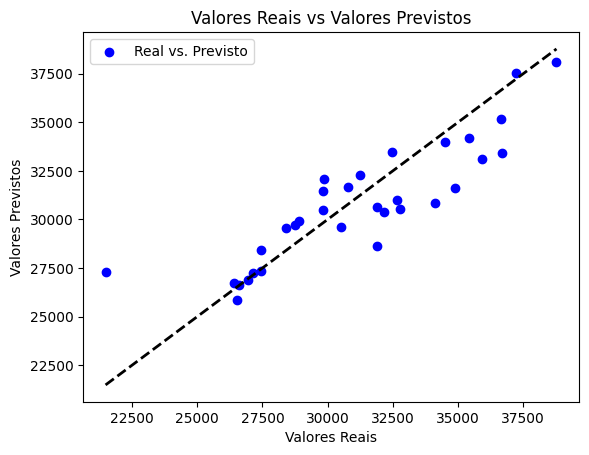

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
erro_medio_quadratico = mean_squared_error(y_test, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

### Plotando os dados reais versus os dados previstos
plt.scatter(y_test, previsoes, label='Real vs. Previsto', color='blue')  # Aqui vamos plotar os valores reais vs. previstos
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Linha diagonal para representar a igualdade
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Valores Previstos')
plt.legend()
plt.show()

**Resultamos em um R2Score = 0.756 !**

